In [2]:
import numpy as np
from matplotlib import pyplot as plt 

def normalize_individual(data):
    # Iterate over each subject | optimized instead of using for
    normalized_data = np.empty_like(data)
    for i in range(data.shape[0]):
        # Calculate the mean and standard deviation for the current subject
        mean = np.mean(data[i])
        std = np.std(data[i])

        # Perform z-normalization for the current subject
        normalized_data[i] = (data[i] - mean) / std
        
    # mean = np.mean(data, axis=(1,2))
    # std = np.std(data, axis=(1,2))
    
    return normalized_data


print("Hello world!")

In [1]:
# datapath = './allData/prognosis/data.npy'
# labelpath= './allData/prognosis/label.npy'

base_hb = 'allData/prognosis/pre_treatment_hamd_reduction_50/data.npy'
base_label= 'allData/prognosis/pre_treatment_hamd_reduction_50/label.npy'

In [ ]:

data = np.load(datapath)
label = np.load(labelpath)
change = label[:,1] - label[:,0]

hbo = data[:,:,:,0,:]
hbr = data[:,:,:,1,:]

hbo_base = normalize_individual(hbo[...,0])
hbo_t8 = normalize_individual(hbo[...,1])


hbr_base = normalize_individual(hbr[...,0])
hbr_t8 = normalize_individual(hbr[...,1])


hbo_change = hbo_t8 - hbo_base

feature_2d = hbo_change.reshape(46,-1)
labels = label[:,1] - label[:,0]

/home/jy/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.857e-01, tolerance: 2.027e-01
  model = cd_fast.enet_coordinate_descent(


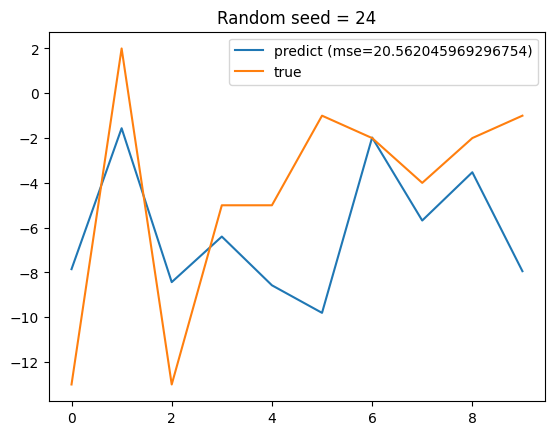

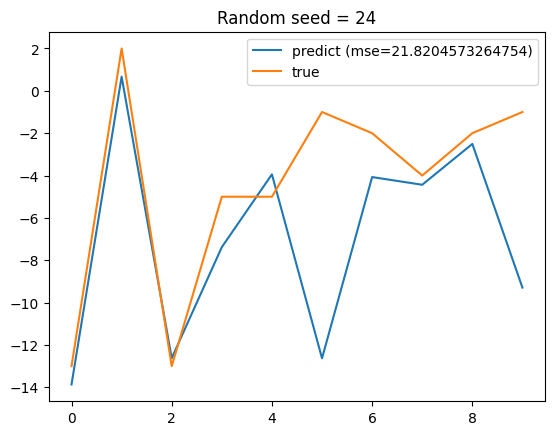

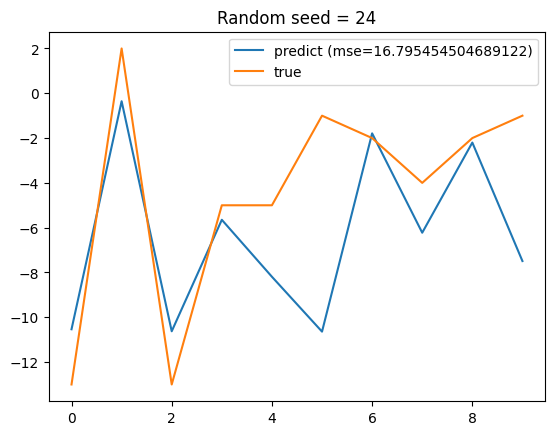

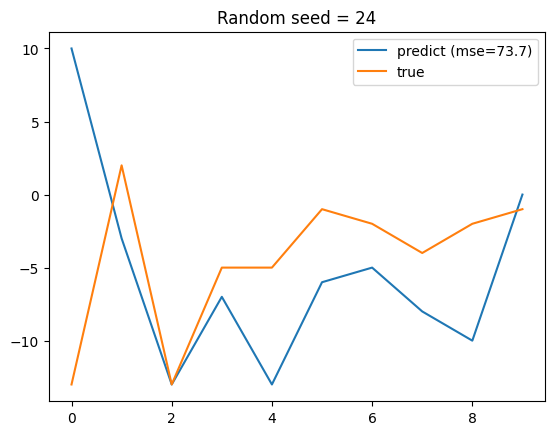

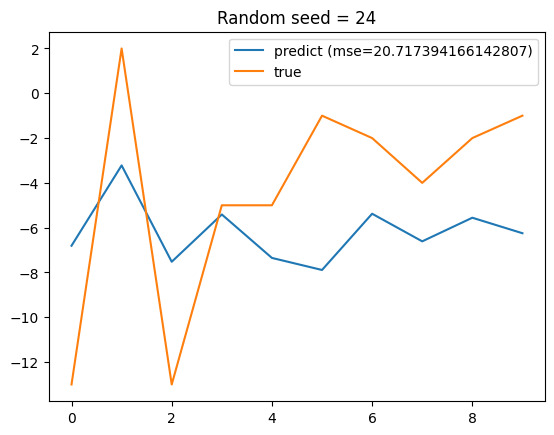

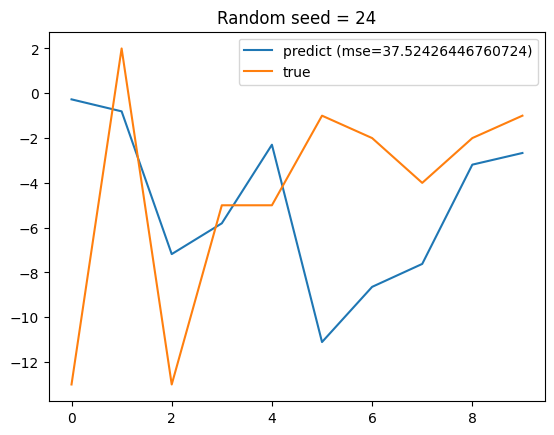

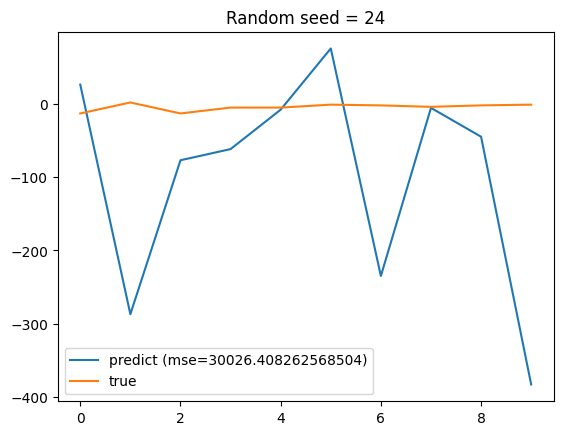

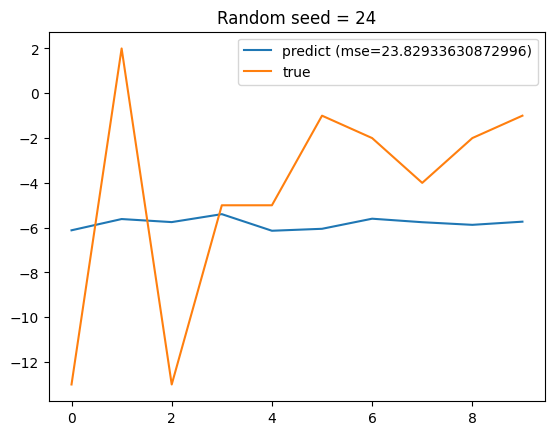

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import BayesianRidge

def plotting_res(y_pred, y_test, mse, random_state):

    plt.figure()
    
    plt.title(f'Random seed = {random_state}')

    plt.plot(y_pred, label=f'predict (mse={mse})')
    plt.plot(y_test, label='true')
    plt.legend()

def using_ridge_regression_model(feature_2d, labels, alpha = 3.0, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize Ridge regression model
    ridge_model = Ridge(alpha=alpha)  # Alpha is the regularization strength

    # Fit the model to the training data
    ridge_model.fit(X_train, y_train)

    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)


def using_lasso_regression_model(feature_2d, labels, alpha=1.0, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize Lasso regression model
    lasso_model = Lasso(alpha=alpha)

    # Fit the model to the training data
    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)

def using_elasticnet_model(feature_2d, labels, alpha=1.0, l1_ratio=0.5, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize ElasticNet model
    elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    # Fit the model to the training data
    elastic_model.fit(X_train, y_train)

    y_pred = elastic_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)

def using_decision_tree_model(feature_2d, labels, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize Decision Tree Regressor
    tree_model = DecisionTreeRegressor(random_state=random_state)

    # Fit the model to the training data
    tree_model.fit(X_train, y_train)

    y_pred = tree_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)
        
def using_svr_model(feature_2d, labels, kernel='rbf', C=50.0, epsilon=0.1, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize Support Vector Regressor
    svr_model = SVR(kernel=kernel, C=C, epsilon=epsilon)

    # Fit the model to the training data
    svr_model.fit(X_train, y_train)

    y_pred = svr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)
        
def using_gradient_boosting_model(feature_2d, labels, n_estimators=50, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize Gradient Boosting Regressor
    gbm_model = GradientBoostingRegressor(n_estimators=n_estimators, random_state=random_state)

    # Fit the model to the training data
    gbm_model.fit(X_train, y_train)

    # Make predictions
    y_pred = gbm_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)

def using_neural_network_model(feature_2d, labels, hidden_layer_sizes=(1000,), random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize MLP Regressor
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, random_state=random_state)

    # Fit the model to the training data
    nn_model.fit(X_train, y_train)

    # Make predictions
    y_pred = nn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)
        
def using_bayesian_regression_with_pca(feature_2d, labels, n_components=45, random_state=24, plotting=False):
    # 将特征降维
    # pca = PCA(n_components=n_components, random_state=random_state)
    # feature_reduced = pca.fit_transform(feature_2d)
    # 数据划分
    X_train, X_test, y_train, y_test = train_test_split(feature_2d[:,:5000], labels, test_size=0.2, random_state=random_state)
    # 初始化和训练模型
    bayesian_model = BayesianRidge(compute_score=True)
    bayesian_model.fit(X_train, y_train)

    # 预测和评估
    y_pred = bayesian_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)
using_lasso_regression_model(feature_2d, labels, alpha=1, plotting=True)
using_ridge_regression_model(feature_2d, labels, alpha=1, plotting=True)
using_elasticnet_model(feature_2d, labels, alpha=1, plotting=True)
using_decision_tree_model(feature_2d, labels, plotting=True)
using_svr_model(feature_2d, labels, plotting=True)
using_gradient_boosting_model(feature_2d, labels, plotting=True)
using_neural_network_model(feature_2d, labels, plotting=True)
using_bayesian_regression_with_pca(feature_2d, labels, plotting=True)




# Future direction

using advance model and incorporate into the framework. See what concluson you want 

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error

def plotting_res(y_pred, y_test, mse, random_state):

    plt.figure()
    
    plt.title(f'Random seed = {random_state}')

    plt.plot(y_pred, label=f'predict (mse={mse})')
    plt.plot(y_test, label='true')
    plt.legend()

def using_ridge_regression_model(feature_2d, labels, alpha = 3.0, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize Ridge regression model
    ridge_model = Ridge(alpha=alpha)  # Alpha is the regularization strength

    # Fit the model to the training data
    ridge_model.fit(X_train, y_train)

    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)


def using_lasso_regression_model(feature_2d, labels, alpha=1.0, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize Lasso regression model
    lasso_model = Lasso(alpha=alpha)

    # Fit the model to the training data
    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)

def using_elasticnet_model(feature_2d, labels, alpha=1.0, l1_ratio=0.5, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize ElasticNet model
    elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    # Fit the model to the training data
    elastic_model.fit(X_train, y_train)

    y_pred = elastic_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)

def using_decision_tree_model(feature_2d, labels, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize Decision Tree Regressor
    tree_model = DecisionTreeRegressor(random_state=random_state)

    # Fit the model to the training data
    tree_model.fit(X_train, y_train)

    y_pred = tree_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)
        
def using_svr_model(feature_2d, labels, kernel='rbf', C=50.0, epsilon=0.1, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize Support Vector Regressor
    svr_model = SVR(kernel=kernel, C=C, epsilon=epsilon)

    # Fit the model to the training data
    svr_model.fit(X_train, y_train)

    y_pred = svr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)
        
def using_gradient_boosting_model(feature_2d, labels, n_estimators=50, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize Gradient Boosting Regressor
    gbm_model = GradientBoostingRegressor(n_estimators=n_estimators, random_state=random_state)

    # Fit the model to the training data
    gbm_model.fit(X_train, y_train)

    # Make predictions
    y_pred = gbm_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)

def using_neural_network_model(feature_2d, labels, hidden_layer_sizes=(1000,), random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize MLP Regressor
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, random_state=random_state)

    # Fit the model to the training data
    nn_model.fit(X_train, y_train)

    # Make predictions
    y_pred = nn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if plotting:
        plotting_res(y_pred, y_test, mse, random_state)
        
def using_bayesian_regression_model(feature_2d, labels, n_iter=10, random_state=24, plotting=False):
    X_train, X_test, y_train, y_test = train_test_split(feature_2d, labels, test_size=0.2, random_state=random_state)

    # Initialize Bayesian Ridge Regressor
    bayesian_model = BayesianRidge(max_iter=n_iter, compute_score=True)

    # Fit the model to the training data
    bayesian_model.fit(X_train, y_train)

    # Make predictions
    y_pred = bayesian_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
# using_lasso_regression_model(feature_2d, labels, alpha=1, plotting=True)
# using_ridge_regression_model(feature_2d, labels, alpha=1, plotting=True)
# using_elasticnet_model(feature_2d, labels, alpha=1, plotting=True)
# using_decision_tree_model(feature_2d, labels, plotting=True)
# using_svr_model(feature_2d, labels, plotting=True)
# using_gradient_boosting_model(feature_2d, labels, plotting=True)
# using_neural_network_model(feature_2d, labels, plotting=True)
using_bayesian_regression_model(feature_2d, labels, plotting=True)

/home/jy/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


    if plotting:
        plt.figure()
        
        plt.title(f'Random seed = {random_state}')

        plt.plot(y_pred, label=f'predict (mse={mse})')
        plt.plot(y_test, label='true')
        plt.legend()
        
